In [19]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Importing the Dataset
# reading the dataset
fertilizer_df = pd.read_csv(r"D:\major project ideas\Fertilizer Prediction.csv") 


In [21]:
fertilizer_df.head() #prints the starting 5 values

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [22]:
fertilizer_df.shape

(99, 9)

In [23]:

fertilizer_df.isnull().any()

Temparature        False
Humidity           False
Moisture           False
Soil Type          False
Crop Type          False
Nitrogen           False
Potassium          False
Phosphorous        False
Fertilizer Name    False
dtype: bool

In [24]:
# Rename the column to match the trained model's feature names
fertilizer_df.rename(columns={'Temparature': 'Temperature'}, inplace=True)

In [25]:

fertilizer_df.columns

Index(['Temperature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [26]:
#in the above we can see that the column names are not in a proper format so we will change the column names
# Fix column name issues (strip spaces)
fertilizer_df.columns = fertilizer_df.columns.str.strip()


In [27]:
#target Variable - Type of Fertilizer
fertilizers = fertilizer_df['Fertilizer Name'].unique()
print("Number of Fertilizers: ",len(fertilizers))
print("List of Fertilizers: ",fertilizers)

Number of Fertilizers:  7
List of Fertilizers:  ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']


In [28]:
fertilizer_df["Fertilizer Name"].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [29]:
for col in ['Soil Type', 'Crop Type', 'Fertilizer Name']:
    print(f"Unique values in {col}: {fertilizer_df[col].unique()}")
    print(f"Number of unique values in {col}: {fertilizer_df[col].nunique()}")

Unique values in Soil Type: ['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
Number of unique values in Soil Type: 5
Unique values in Crop Type: ['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts']
Number of unique values in Crop Type: 11
Unique values in Fertilizer Name: ['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26']
Number of unique values in Fertilizer Name: 7


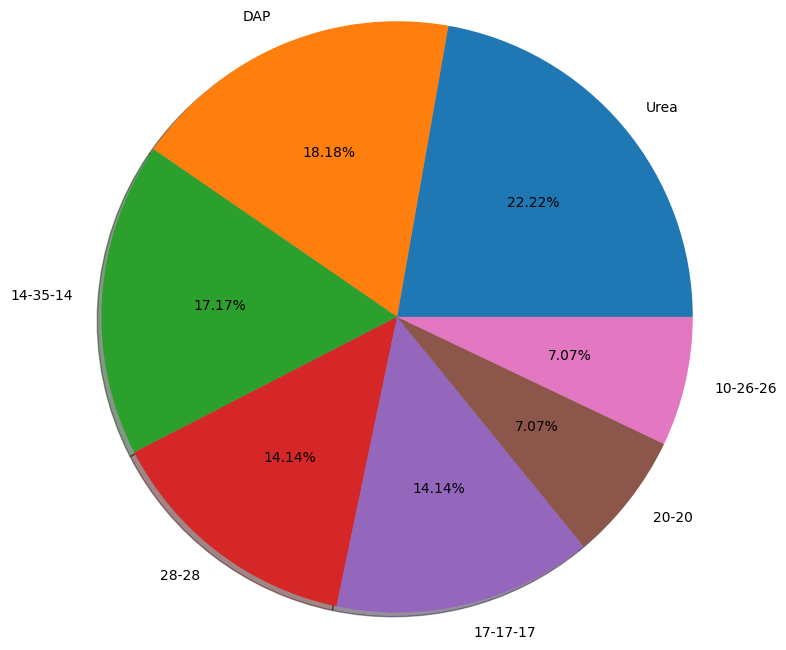

In [30]:
fig,ax=plt.subplots()
ax.pie(fertilizer_df['Fertilizer Name'].value_counts(),labels=list(fertilizer_df['Fertilizer Name'].unique()),radius=2,autopct="%1.2f%%",shadow=True)
plt.show()

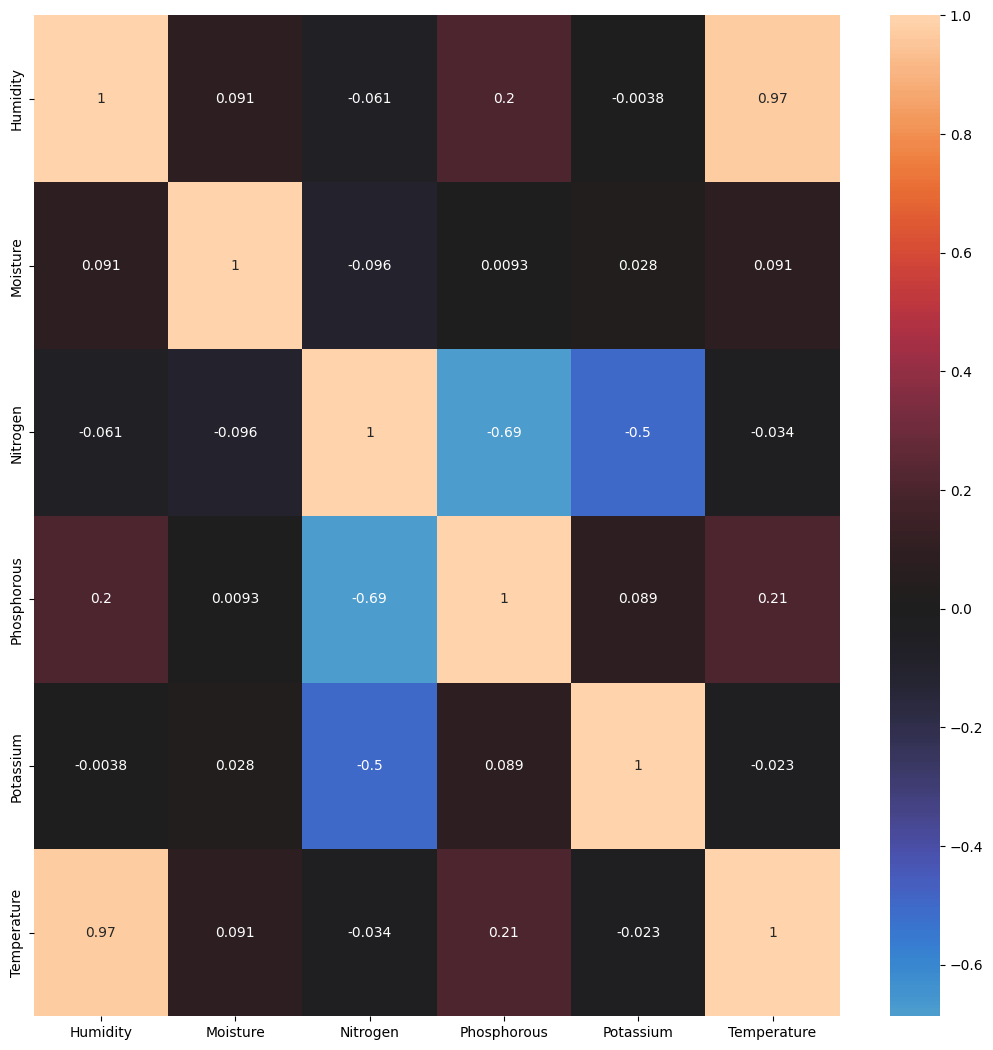

In [31]:
plt.figure(figsize=(13,13))
sns.heatmap(fertilizer_df[fertilizer_df.columns.difference(["Soil Type","Crop Type","Fertilizer Name"])].corr(),center=0,annot=True)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Encode categorical variables
soil_encoder = LabelEncoder()
crop_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()

In [33]:
fertilizer_df["Soil Type"] = soil_encoder.fit_transform(fertilizer_df["Soil Type"])
fertilizer_df["Crop Type"] = crop_encoder.fit_transform(fertilizer_df["Crop Type"])
fertilizer_df["Fertilizer Name"] = fertilizer_encoder.fit_transform(fertilizer_df["Fertilizer Name"])

In [34]:
print("Soil Type Encoded Values: ",fertilizer_df["Soil Type"].unique())
print("Crop Type Encoded Values: ",fertilizer_df["Crop Type"].unique())

Soil Type Encoded Values:  [4 2 0 3 1]
Crop Type Encoded Values:  [ 3  8  1  9  6  0 10  4  5  7  2]


In [35]:
# Define feature set and target variable
features = ["Temperature", "Humidity", "Moisture", "Soil Type", "Crop Type", "Nitrogen", "Phosphorous", "Potassium"]
X = fertilizer_df[features]
y = fertilizer_df["Fertilizer Name"]  # Target variable

In [36]:
# Standardize numerical features for better QDA performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
# Train QDA model
qda_fertilizer = QuadraticDiscriminantAnalysis()
qda_fertilizer.fit(X_train, y_train)

d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full ran

QuadraticDiscriminantAnalysis()

In [39]:
# Evaluate model accuracy
accuracy = qda_fertilizer.score(X_test, y_test)
print(f"✅ QDA Fertilizer Model Accuracy: {accuracy * 100:.2f}%")

✅ QDA Fertilizer Model Accuracy: 90.00%


✅ QDA Fertilizer Model Accuracy: 90.00%

In [40]:
# Function to predict fertilizer
def predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type, nitrogen, phosphorous, potassium):
    try:
        # Encode categorical inputs
        soil_encoded = soil_encoder.transform([soil_type])[0]
        crop_encoded = crop_encoder.transform([crop_type])[0]

        # Create feature array and standardize
        input_features = np.array([[temperature, humidity, moisture, soil_encoded, crop_encoded, nitrogen, phosphorous, potassium]])
        input_scaled = scaler.transform(input_features)

        # Predict fertilizer
        fertilizer_encoded = qda_fertilizer.predict(input_scaled)[0]
        predicted_fertilizer = fertilizer_encoder.inverse_transform([fertilizer_encoded])[0]

        return predicted_fertilizer

    except Exception as e:
        return f"Error: {str(e)}"

# Example Usage
predicted_fertilizer = predict_fertilizer(temperature=28, humidity=60, moisture=40, soil_type="Loamy", crop_type="Wheat", nitrogen=20, phosphorous=30, potassium=10)
print(f"🌾 Recommended Fertilizer: {predicted_fertilizer}")

🌾 Recommended Fertilizer: 14-35-14


d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


The below code has VotingClassifier:
    VotingClassifier combines multiple models (QDA, Random Forest, Logistic Regression)
    Majority rule ("hard" voting) determines the final prediction
    Provides a more stable and accurate prediction than QDA alone

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
import pickle   

In [42]:
# Define individual models
qda = QuadraticDiscriminantAnalysis()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('qda', qda),
    ('random_forest', rf),
    ('log_reg', log_reg)
], voting='hard')  # 'hard' voting uses majority rule, 'soft' uses probability averaging

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Evaluate model accuracy
accuracy = voting_clf.score(X_test, y_test)
print(f"✅ Voting Classifier Fertilizer Model Accuracy: {accuracy * 100:.2f}%")


d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 4 is not full ran

✅ Voting Classifier Fertilizer Model Accuracy: 100.00%


In [43]:
import pickle

# Save the trained model, encoders, and scaler
with open("fertilizer_model.pkl", "wb") as f:
    pickle.dump({
        "model": voting_clf, 
        "soil_encoder": soil_encoder, 
        "crop_encoder": crop_encoder, 
        "scaler": scaler, 
        "fertilizer_encoder": fertilizer_encoder
    }, f)

print("✅ Model successfully saved as fertilizer_model.pkl")

✅ Model successfully saved as fertilizer_model.pkl


In [44]:

# Function to predict fertilizer
def predict_fertilizer(temperature, humidity, moisture, soil_type, crop_type, nitrogen, phosphorous, potassium):
    try:
        # Encode categorical inputs
        soil_encoded = soil_encoder.transform([soil_type])[0]
        crop_encoded = crop_encoder.transform([crop_type])[0]

        # Create feature array and standardize
        input_features = np.array([[temperature, humidity, moisture, soil_encoded, crop_encoded, nitrogen, phosphorous, potassium]])
        input_scaled = scaler.transform(input_features)

        # Predict fertilizer using VotingClassifier
        fertilizer_encoded = voting_clf.predict(input_scaled)[0]
        predicted_fertilizer = fertilizer_encoder.inverse_transform([fertilizer_encoded])[0]

        return predicted_fertilizer

    except Exception as e:
        return f"Error: {str(e)}"

# Example Usage
predicted_fertilizer = predict_fertilizer(temperature=28, humidity=60, moisture=40, soil_type="Loamy", crop_type="Wheat", nitrogen=20, phosphorous=30, potassium=10)
print(f"🌾 Recommended Fertilizer: {predicted_fertilizer}")

🌾 Recommended Fertilizer: 14-35-14


d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


✅ Voting Classifier Fertilizer Model Accuracy: 100.00%

In [45]:
crop_fertilizer_mapping = {
    "Paddy": ["Rice"],
    "Pulses": ["Lentil", "Chickpea", "Kidney Beans"],
    "Millets": ["Millets", "Mungbean", "Blackgram"],
    "Oil seeds": ["Pomegranate", "Banana", "Mango", "Grapes"],
    "Ground Nuts": ["Coffee"]
}


In [46]:
crop_type = "Pomegranate"
for key, values in crop_fertilizer_mapping.items():
    if crop_type in values:
        print(f"Detected Crop Category: {key}")

Detected Crop Category: Oil seeds


In [47]:
fertilizer = predict_fertilizer(temperature=50, humidity=35, moisture=25, soil_type="Sandy", crop_type=key, nitrogen=35, phosphorous=40, potassium=65)
print(f"Recommended Fertilizer: {fertilizer}")


Recommended Fertilizer: 10-26-26


d:\major project ideas\Project implementation\mpenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
